# Realistic set-up

In [84]:
from oggm import cfg
from oggm import tasks, utils, workflow, graphics
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [85]:
import warnings
# Some annoying warnings sometimes
warnings.filterwarnings(action='ignore', category=UserWarning)

## Pick a glacier 

In [86]:
# Initialize OGGM and set up the default run parameters
cfg.initialize(logging_level='INFO')
dir_path = utils.get_temp_dir('snowslide')
# Local working directory (where OGGM will write its output)
cfg.PATHS['working_dir'] = utils.mkdir(dir_path)

2024-01-19 20:47:18: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2024-01-19 20:47:18: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2024-01-19 20:47:18: oggm.cfg: Multiprocessing: using all available processors (N=8)


In [87]:
# rgi_ids = ['RGI60-11.01450']  # This is Aletsch
# rgi_ids = ['RGI60-11.00897']  # This is Hintereisferner
# rgi_ids = ['RGI60-11.03466']  # This is Talefre 
rgi_ids = ['RGI60-11.03638']  # This is Argentiere

# This is the url with snowslide already run!
# base_url = 'https://cluster.klima.uni-bremen.de/~fmaussion/runs/tests_snowslide/alps_gdirs_whypso/'

# This is the url with loads of data (dhdt, velocities, etc)
base_url = base_url = 'https://cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.6/L3-L5_files/2023.1/elev_bands/W5E5_w_data/'

# Can be replaced with 
# https://cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.6/L3-L5_files/2023.1/elev_bands/W5E5 
# for smaller data

# This gets the data for this glacier - download can be a bit long because of all the data
# gdir = workflow.init_glacier_directories(rgi_ids, prepro_base_url=base_url, from_prepro_level=3, prepro_border=80)[0]
gdirs = workflow.init_glacier_directories(rgi_ids, prepro_base_url=base_url, from_prepro_level=3, prepro_border=80)

2024-01-19 20:47:20: oggm.workflow: init_glacier_directories from prepro level 3 on 1 glaciers.
2024-01-19 20:47:20: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 1 glaciers


Import snowslide as an OGGM task

In [88]:
from snowslide import oggm_snowslide_compat

In [89]:
# run the tasks
workflow.execute_entity_task(oggm_snowslide_compat.snowslide_to_gdir, gdirs)

2024-01-19 20:47:23: oggm.workflow: Execute entity tasks [snowslide_to_gdir] on 1 glaciers
2024-01-19 20:47:23: snowslide.oggm_snowslide_compat: (RGI60-11.03638) snowslide_to_gdir
2024-01-19 20:47:28: snowslide.snowslide_main: (RGI60-11.03638) the algorithm converged in 48 iterations


[None]

In [90]:
df = oggm_snowslide_compat.compile_snowslide_statistics(gdirs)

2024-01-19 20:47:29: snowslide.oggm_snowslide_compat: Applying global task compile_snowslide_statistics on 1 glaciers
2024-01-19 20:47:29: oggm.workflow: Execute entity tasks [snowslide_statistics] on 1 glaciers
2024-01-19 20:47:29: snowslide.oggm_snowslide_compat: (RGI60-11.03638) snowslide_statistics


In [91]:
gdirs

[<oggm.GlacierDirectory>
   RGI id: RGI60-11.03638
   Region: 11: Central Europe
   Subregion: 11-01: Alps                            
   Name: Fr4N01235A08 Dargentiere
   Glacier type: Glacier
   Terminus type: Land-terminating
   Status: Glacier or ice cap
   Area: 13.795 km2
   Lon, Lat: (6.985, 45.951)
   Grid (nx, ny): (278, 269)
   Grid (dx, dy): (62.0, -62.0)]

## Gridded data

In [92]:
gdir = gdirs[0]

In [93]:
# Get the path to the gridded data file & open it
with xr.open_dataset(gdir.get_filepath('gridded_data')) as ds:
    ds = ds.load()

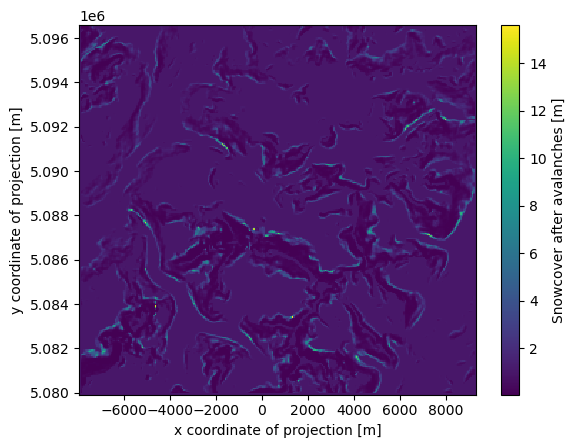

In [94]:
ds.snowslide_1m.plot();

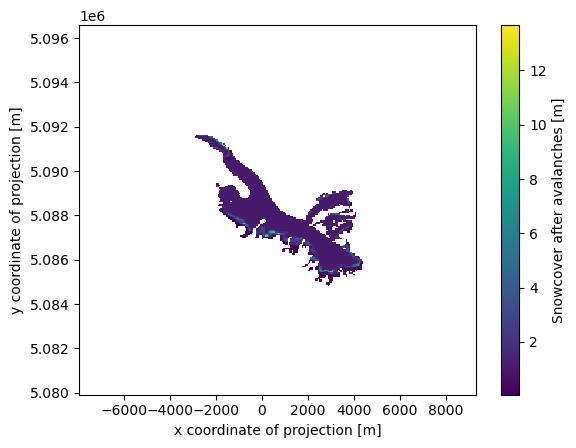

In [95]:
ds.snowslide_1m.where(ds.glacier_mask).plot();

In [96]:
add = ds.snowslide_1m.where(ds.glacier_mask, drop=True) - 1

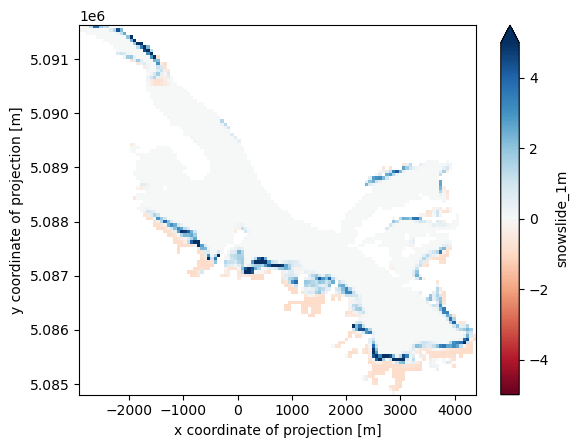

In [97]:
add.plot(cmap='RdBu', vmin=-5, vmax=5);

In [98]:
ds

<xarray.Dataset>
Dimensions:                  (x: 278, y: 269)
Coordinates:
  * x                        (x) float32 -7.914e+03 -7.852e+03 ... 9.26e+03
  * y                        (y) float32 5.097e+06 5.096e+06 ... 5.08e+06
Data variables:
    topo                     (y, x) float32 2.262e+03 2.278e+03 ... 2.513e+03
    topo_smoothed            (y, x) float32 2.311e+03 2.305e+03 ... 2.526e+03
    topo_valid_mask          (y, x) int8 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    glacier_mask             (y, x) int8 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    glacier_ext              (y, x) int8 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    consensus_ice_thickness  (y, x) float32 nan nan nan nan ... nan nan nan nan
    millan_ice_thickness     (y, x) float32 nan nan nan nan ... nan nan nan nan
    millan_v                 (y, x) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    millan_vx                (y, x) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    millan_vy                (y, x) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    hugonnet_dhdt            (y, x) float32 nan nan nan ... 0.02326 0.02848
    snowslide_1m             (y, x) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
Attributes:
    author:         OGGM
    author_info:    Open Global Glacier Model
    pyproj_srs:     +proj=tmerc +lat_0=0 +lon_0=6.985 +k=0.9996 +x_0=0 +y_0=0...
    max_h_dem:      4080.0
    min_h_dem:      1049.0
    max_h_glacier:  3728.0
    min_h_glacier:  1539.0

In [99]:
# Map resolution
gdir.grid.dx

62.0

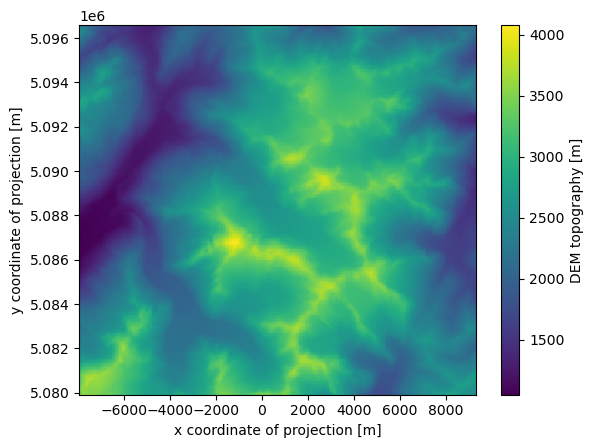

In [100]:
ds.topo.plot();

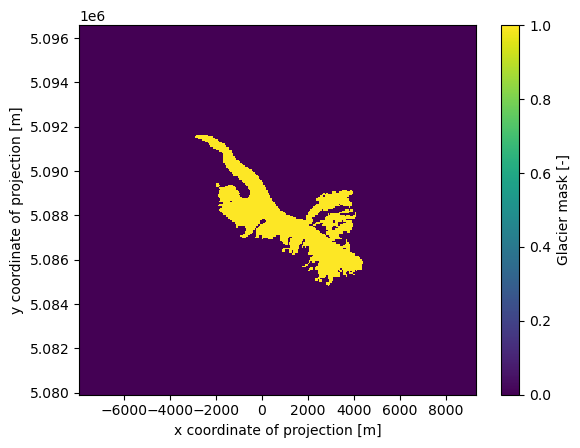

In [101]:
ds.glacier_mask.plot();

Check this tutorial to plot more stuff: https://oggm.org/tutorials/stable/notebooks/10minutes/machine_learning.html

### Also works with climate data 

In [102]:
# Get the path to the climate data file
climate_data_path = gdir.get_filepath('climate_historical')

# Open it
with xr.open_dataset(climate_data_path) as ds_clim:
    ds_clim = ds_clim.load()
    
ds_clim

<xarray.Dataset>
Dimensions:   (time: 1428)
Coordinates:
  * time      (time) datetime64[ns] 1901-01-01 1901-02-01 ... 2019-12-01
Data variables:
    prcp      (time) float32 94.16 8.007 85.21 135.3 ... 59.08 153.4 182.1 194.0
    temp      (time) float32 -5.958 -9.201 -4.13 0.8985 ... 9.9 6.6 0.3 -0.5
    temp_std  (time) float32 4.516 6.287 3.005 3.122 ... 2.742 1.807 3.548 2.588
Attributes:
    ref_hgt:         1940.0
    ref_pix_lon:     6.75
    ref_pix_lat:     45.75
    ref_pix_dis:     28823.67358258575
    climate_source:  GSWP3_W5E5
    yr_0:            1901
    yr_1:            2019
    author:          OGGM
    author_info:     Open Global Glacier Model

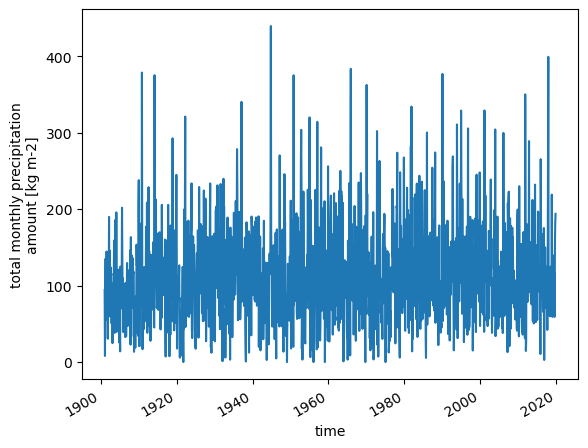

In [103]:
ds_clim.prcp.plot();

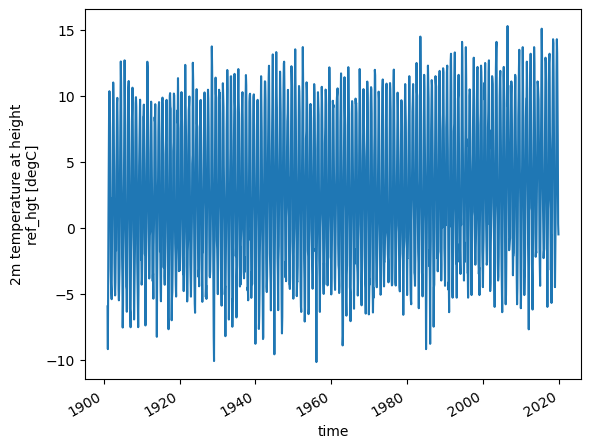

In [104]:
ds_clim.temp.plot();

In [105]:
ds.snowslide_1m

<xarray.DataArray 'snowslide_1m' (y: 269, x: 278)>
array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.160929  , 0.08460701, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.16245702, 0.1934166 , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 0.24051727, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.27451217, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]], dtype=float32)
Coordinates:
  * x        (x) float32 -7.914e+03 -7.852e+03 -7.79e+03 ... 9.198e+03 9.26e+03
  * y        (y) float32 5.097e+06 5.096e+06 5.096e+06 ... 5.08e+06 5.08e+06
Attributes:
    units:      m
    long_name:  Snowcover after avalanches

## Create an OGGM task to add data to the glacier directory

See https://github.com/OGGM/oggm/blob/f305390e09a55c1fa204f4d7834c0e377f1c812f/oggm/shop/bedtopo.py#L22 for inspiration

Here we will just add a dummy mask to the file, to use it later:

In [106]:
#avalanches = ((ds.topo > 3000) & (ds.topo < 3100) & (ds.glacier_mask == 1)) * 2000
#avalanches.plot();

In [107]:
# Add it to the dataset and write the file back to disk
#ds['avalanches'] = avalanches
#ds.to_netcdf(gridded_data_path)

## Obtain the avalanche data back to the flowlines 

We use OGGM for this. These are "binning" variables to 1D flowlines. 

Documentation:
- https://docs.oggm.org/en/stable/generated/oggm.tasks.elevation_band_flowline.html
- https://docs.oggm.org/en/stable/generated/oggm.tasks.fixed_dx_elevation_band_flowline.html

In [108]:
tasks.elevation_band_flowline(gdir, bin_variables=['snowslide_1m', 'millan_v', 'hugonnet_dhdt'])
tasks.fixed_dx_elevation_band_flowline(gdir, bin_variables=['snowslide_1m', 'millan_v', 'hugonnet_dhdt'], preserve_totals=True)

2024-01-19 20:47:58: oggm.core.centerlines: (RGI60-11.03638) elevation_band_flowline
/mnt/c/Users/kneibm/Documents/OGGM/oggm/oggm/core/centerlines.py:2301: RuntimeWarning: Mean of empty slice
  df.loc[bi, var] = np.nanmean(data[bin_coords])
2024-01-19 20:47:58: oggm.core.centerlines: (RGI60-11.03638) fixed_dx_elevation_band_flowline


We just wrote a new file to disk. Let's open it:

In [109]:
binned_data_file = gdir.get_filepath('elevation_band_flowline', filesuffix='_fixed_dx')
binned_data = pd.read_csv(binned_data_file, index_col=0)
binned_data

,widths_m,area_m2,snowslide_1m,millan_v,hugonnet_dhdt
dis_along_flowline,,,,,
62.0,316.752446,39277.303335,6.099355,5.613090,NaN
186.0,1107.818442,137369.486763,6.836947,12.174993,-0.227369
310.0,1643.800669,203831.282906,18.830622,43.591102,-0.340548
434.0,1971.293271,244440.365580,13.645929,22.143576,-0.291095
558.0,2629.341482,326038.343709,14.761657,27.572208,-0.328318
...,...,...,...,...,...
7502.0,284.960968,35335.160073,21.345002,48.790115,-2.177004
7626.0,319.152492,39574.908951,21.860732,46.721052,-1.586653
7750.0,280.047055,34725.834834,26.876111,26.808458,-0.337718


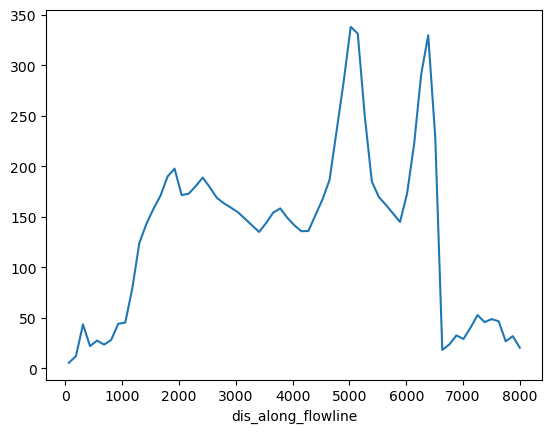

In [110]:
binned_data.millan_v.plot();

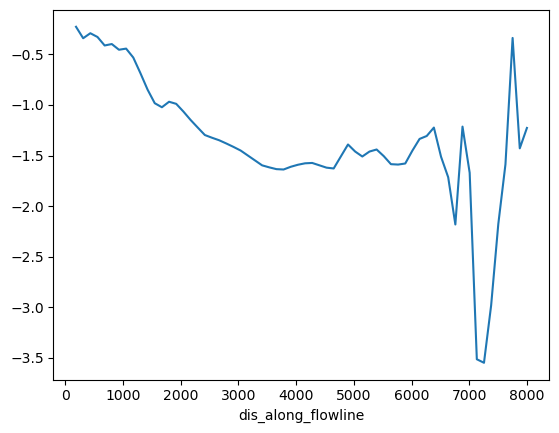

In [111]:
binned_data.hugonnet_dhdt.plot();

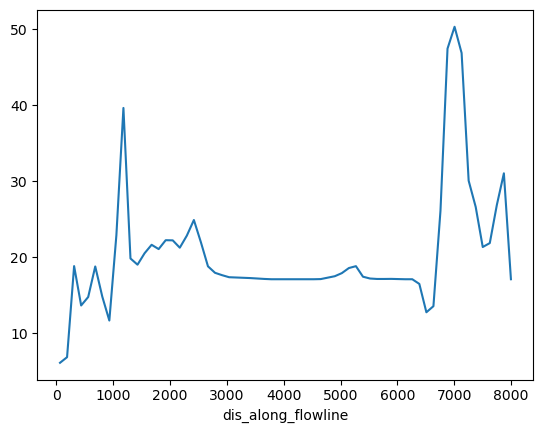

In [112]:
binned_data.snowslide_1m.plot();

The "dis_along_flowline" variable is not consistent with what OGGM thinks of length (see bug report). This is not a big deal, the length of the data is still correct, so the below works.

In [113]:
# Note: glacier "length" according to RGI
gdir.read_shapefile('outlines')['Lmax'].iloc[0]

'9201'

## Use this information in the MB model 

This is a bit far stretched but lets go:

In [114]:
from oggm.core import massbalance
from oggm.core.massbalance import mb_calibration_from_scalar_mb, mb_calibration_from_geodetic_mb, mb_calibration_from_wgms_mb
from oggm.core.massbalance import MonthlyTIModel_avalanches
from oggm.core.massbalance import MonthlyTIModel

In [115]:
gdir.get_climate_info()


{'baseline_climate_source': 'GSWP3_W5E5',
 'baseline_yr_0': 1901,
 'baseline_yr_1': 2019,
 'baseline_climate_ref_hgt': 1940.0,
 'baseline_climate_ref_pix_lon': 6.75,
 'baseline_climate_ref_pix_lat': 45.75}

In [116]:
gdir.read_json('mb_calib')


{'rgi_id': 'RGI60-11.03638',
 'bias': 0,
 'melt_f': 4.921739306022584,
 'prcp_fac': 2.9678199250286412,
 'temp_bias': -0.6334219228429602,
 'reference_mb': -1049.4,
 'reference_mb_err': 166.8,
 'reference_period': '2000-01-01_2020-01-01',
 'mb_global_params': {'temp_default_gradient': -0.0065,
  'temp_all_solid': 0.0,
  'temp_all_liq': 2.0,
  'temp_melt': -1.0},
 'baseline_climate_source': 'GSWP3_W5E5'}

In [ ]:
class AvalancheMassBalance(MonthlyTIModel):
    """We Inherit from the standard model, but will add some stuff to it"""

    def __init__(self, *args, **kwargs):
        """ """
        super(AvalancheMassBalance, self).__init__(*args, **kwargs)

    def get_annual_mb(self, heights, year=None, **kwargs):      
        # Here we get the default MB
        smb = super(AvalancheMassBalance, self).get_annual_mb(heights, year=year, **kwargs) 
        
        # Add avalanches
        where_is_avalanche = np.nonzero(binned_data.snowslide_1m.values > 0)
        
        smb[where_is_avalanche] += binned_data.snowslide_1m.values[where_is_avalanche] / cfg.SEC_IN_YEAR / self.rho
        
        # Return
        return smb 

Compare the two mb models:

In [117]:
# Get model geometry
flowline = gdir.read_pickle('inversion_flowlines')[0]

# Create the MB models 
# This creates and average of the MB model over a certain period
mb_control = massbalance.MonthlyTIModel_avalanches(gdir)
mb_ava = massbalance.MonthlyTIModel(gdir)

TypeError: super(type, obj): obj must be an instance or subtype of type

In [ ]:
# Prepare the data
df_control = pd.DataFrame(index=flowline.dx_meter * np.arange(flowline.nx))
df_ava = pd.DataFrame(index=flowline.dx_meter * np.arange(flowline.nx))
for year in range(2000, 2020):
    df_control[year] = mb_control.get_annual_mb(flowline.surface_h, year=year) * cfg.SEC_IN_YEAR * mb_control.rho
    df_ava[year] = mb_ava.get_annual_mb(flowline.surface_h, year=year) * cfg.SEC_IN_YEAR * mb_control.rho

In [ ]:
df_control.plot(legend=False);

In [ ]:
df_ava.plot(legend=False);

In [ ]:
df_control.mean(axis=1).plot(label='Control');
df_ava.mean(axis=1).plot(label='Avalanches');
plt.legend(); plt.title('2000-2020 SMB'); plt.xlabel('Dis along flowline'); plt.ylabel('Annual SMB');

## Feed the models to the simulations 

In [ ]:
cfg.PARAMS['store_fl_diagnostics'] = True

In [ ]:
tasks.run_random_climate(gdir, nyears=100, y0=2009, halfsize=10, seed=0,
                         mb_model_class=massbalance.MonthlyTIModel, 
                         output_filesuffix='_control');

In [ ]:
tasks.run_random_climate(gdir, nyears=100, y0=2009, halfsize=10, seed=0,
                         mb_model_class=AvalancheMassBalance, 
                         output_filesuffix='_ava');

In [ ]:
with xr.open_dataset(gdir.get_filepath('model_diagnostics', filesuffix='_control')) as ds:
    ds_avg_control = ds.load()
with xr.open_dataset(gdir.get_filepath('model_diagnostics', filesuffix='_ava')) as ds:
    ds_avg_ava = ds.load()

In [ ]:
ds_avg_control.volume_m3.plot(label='Control');
ds_avg_ava.volume_m3.plot(label='Avalanches');
plt.legend();

In [ ]:
with xr.open_dataset(gdir.get_filepath('fl_diagnostics', filesuffix='_control'), group='fl_0') as ds:
    ds_fl_control = ds.load()
with xr.open_dataset(gdir.get_filepath('fl_diagnostics', filesuffix='_ava'), group='fl_0') as ds:
    ds_fl_ava = ds.load()

In [ ]:
ds_sel_control = ds_fl_control.isel(time=-1).sel(dis_along_flowline=ds_fl_control.dis_along_flowline < 5000) 
ds_sel_ava = ds_fl_ava.isel(time=-1).sel(dis_along_flowline=ds_fl_ava.dis_along_flowline < 5000) 

ds_sel_control.bed_h.plot(color='k');
(ds_sel_control.bed_h + ds_sel_control.thickness_m).plot(label='Control');
(ds_sel_ava.bed_h + ds_sel_ava.thickness_m).plot(label='Avalanches');
plt.legend();

In [ ]:
ds_sel_control.thickness_m.plot(label='Control');
ds_sel_ava.thickness_m.plot(label='Avalanches');
plt.legend();

In [ ]:
ds_sel_control.ice_velocity_myr.plot(label='Control');
ds_sel_ava.ice_velocity_myr.plot(label='Avalanches');
plt.legend();

## Things to think about 

- here we apply avalanching as a constant positive MB - in the future, will the avalanche amounts change?
- what about the time dependency?
- importantly, we apply the avalanches without recalibrating the MB. The purpose will be to actually recalibrate the MB with the new information
- on a glacier per glacier basis we will likely find that influence of avalanches will be small. But at the regional scale, in some regions in the himalayas, I think we can make a difference.
- lots to think about!